# Project 2: 2-Mode Networks

## Course: Data 620 - Web Analytics

## Group Members: Coffy Andrews-Guo & Tora Mullings

### Submission Date: June 26, 2023

[GitHub Source Code](https://github.com/candrewxs/D620/tree/main/Project2)

The objective of this week's assignment:

1. Identify a large 2-node network dataset - start with a dataset in a repository. The data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method (Chapter 4 of the social network analysis).
3. What can you infer about each of the distinct groups?

## Section 1: 2-Node Network Dataset

The dataset was collected by Cai-Nicolas Ziegler from the Book-Crossing community in August/September 2004. The dataset contains anonymized information from 278,858 users, including demographic data, and includes 1,149,780 ratings (both explicit and implicit) for 271,379 books.It provides valuable information for studying user preferences and behavior in the context of book recommendations.

This network contains information about books read by members of the BookCrossing community. *Nodes of the network are users and books, and an edge denotes that a user has interacted with a book*.

For more information visit: [Book-Crossing Dataset Website](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)


#### Load Data

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import matplotlib.pyplot as plt
import networkx.algorithms.bipartite as bipartite

# disable warnings
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# for data visualization
import nxviz as nv 
import seaborn as sns
from IPython.display import Image

In [3]:
# fetch the data and parse 
data = pd.read_csv('https://raw.githubusercontent.com/candrewxs/D620/main/Project2/BXBookRatings.csv', index_col= False)

data.head(10)

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [4]:
# get the length of each dimension
print(data.shape)

(1048575, 3)


In [5]:
# check data type
data.dtypes

User_ID         int64
ISBN           object
Book_Rating     int64
dtype: object

#### Measure to distinguish user preferences

The book rating information contains ratings (`Book-Rating`) that are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

*Explicit ratings:* Explicit ratings are when the user explicity rates the item.\
*Implicit ratings:* Implicit ratings don't ask users to give any ratings, the user behavior is only observed.

In [6]:
data['Book_Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [7]:
#Segragating implicit and explict ratings datasets
ratings_explicit = data[data.Book_Rating != 0]
ratings_implicit = data[data.Book_Rating == 0]

In [8]:
from IPython.display import display, HTML

CSS = """
.output {
flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [9]:
display(ratings_explicit.head(5))

display(ratings_implicit.head(5))

,User_ID,ISBN,Book_Rating
1,276726,155061224,5
3,276729,052165615X,3
4,276729,521795028,6
6,276736,3257224281,8
7,276737,600570967,6


,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
2,276727,446520802,0
5,276733,2080674722,0
10,276746,425115801,0
11,276746,449006522,0


In [10]:
print('There are {x} users and books in the Book-Crossing data set'.format(x = len(data.User_ID)))

There are 1048575 users and books in the Book-Crossing data set


In [11]:
print('There are {} user explicit ratings, indicating the number of members that provided ratings on the book.'.format(len(ratings_explicit)))

There are 397245 user explicit ratings, indicating the number of members that provided ratings on the book.


In [12]:
print('There are {} user implicit ratings, indicating the number of members whose behavior was only observed.'.format(len(ratings_implicit)))

There are 651330 user implicit ratings, indicating the number of members whose behavior was only observed.


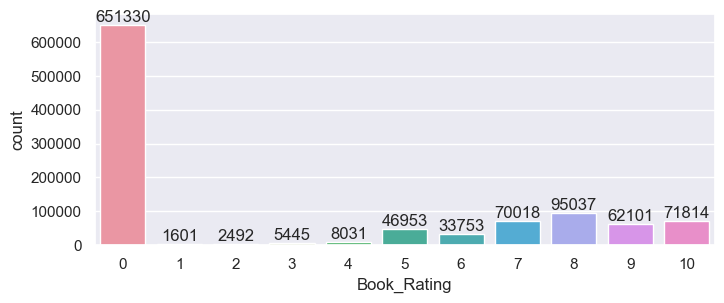

In [13]:
# visual plot - "Book_Rating"
sns.set(style = "darkgrid")

plt.figure(figsize = (8, 3))
ax = sns.countplot(data = data, x= 'Book_Rating')
ax.bar_label(ax.containers[0])
plt.show()

The histogram shows the dataframe rating distribution, `Book_Rating`, based on users from the BookCrossing community. 

### Create Bipartite Graph Object

In network analysis, data can be represented in different modes, including 1-mode (unimodal) and 2-mode (bimodal or bipartite) formats. In a 2-mode network, there are two distinct types of nodes, and the links exist between nodes of one type to nodes of the other type, but not within the same type.

In [14]:
#create graph object from data frame of edge list.
# G is an undirected graph
G = nx.from_pandas_edgelist(data, source='User_ID', target='ISBN', edge_attr=['Book_Rating'])

In [15]:
def print_graph_stats(title, G):
    print("Simple stats for: " + title)
    print("Number of nodes: " + str(len(G.nodes())))
    print("Number of edges: " + str(len(G.edges())))
    print("Graph density: " + str(nx.density(G)))
    print("Is graph connected? " + str(nx.is_connected(G)))
    print("Graph type: " + str(type(G)))
    
print_graph_stats("Book-Crossing network", G)

Simple stats for: Book-Crossing network
Number of nodes: 417986
Number of edges: 1048450
Graph density: 1.2002046005593108e-05
Is graph connected? False
Graph type: <class 'networkx.classes.graph.Graph'>


Analyzing the dataset as a network graph, it is observed that the number of edges matches the number of rows in the dataframe, indicating that each row represents an edge. The graph has a low density value of *0.0012*, suggesting a relatively sparse network with few connections compared to the total possible connections. The graph is unconnected, indicating the presence of isolated clusters or subgraphs within the network. Additionally, the graph is undirected, indicating bidirectional relationships between nodes.

In [16]:
print("Number of Connected Components in Graph: {}".format(nx.number_connected_components(G)))

Number of Connected Components in Graph: 10388


In [17]:
#check graph is exactly a bipartite graph
print("Is the Graph Bi-Partite? {}".format(nx.is_bipartite(G)))

Is the Graph Bi-Partite? True


In [18]:
list(G.nodes(data = True))[0:5:None]

[(276725, {}),
 ('034545104X', {}),
 (276726, {}),
 ('155061224', {}),
 (276727, {})]

The summary shows that bipartite graph nodes and edges do not belong to a `set`. We will construct a two (bi) node partitions containing only unique members for the node and edge set.

### Construct the Bipartite Network

Construct the bipartite graph using `Networkx` **add_nodes_from()** 

In [19]:
#User_ID
User_ID = data.iloc[:, 0].unique().tolist()

#ISBN
ISBN = data.iloc[:,1].unique().tolist()

#add the node type in bipartite
G.add_nodes_from(User_ID, bipartite=0)
G.add_nodes_from(ISBN, bipartite=1)

In [20]:
nx.is_connected(G)

False

The input graph is not connected. We will pass a container with all nodes of one bipartite node set as an argument to the bipartite function.

In [21]:
# use the bipartite node attribute to get the two node sets:
top_nodes = {n for n, d in G.nodes(data = True) if d["bipartite"] == 0}
bottom_nodes = set(G) - top_nodes

In [22]:
print(round(bipartite.density(G, bottom_nodes), 6))

top_nodes = bipartite.projected_graph(G, top_nodes)

3.4e-05


In [30]:
# saving the networkx graph in gexf format
#nx.write_gexf(G, 'D:/CUNY SPS/2023 Summer Course/DATA 620_Web Analytics/A2G0.gexf')

**Bipartite Entire Network View - Gephi Layout**

The nodes are colored based the two node set: top node (0) red, and bottom node (2) green.
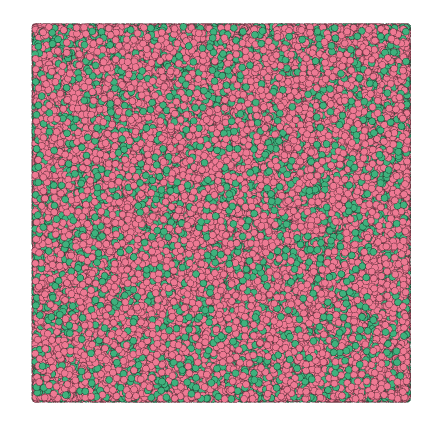

In [23]:
list(G.nodes(data = True))[0:5:None]

[(276725, {'bipartite': 0}),
 ('034545104X', {'bipartite': 1}),
 (276726, {'bipartite': 0}),
 ('155061224', {'bipartite': 1}),
 (276727, {'bipartite': 0})]

In [24]:
list(G.edges(data = True))[0:5]

[(276725, '034545104X', {'Book_Rating': 0}),
 ('034545104X', 2313, {'Book_Rating': 5}),
 ('034545104X', 6543, {'Book_Rating': 0}),
 ('034545104X', 8680, {'Book_Rating': 5}),
 ('034545104X', 10314, {'Book_Rating': 9})]

In [25]:
print('The dataframe contains {x} unique books rated by members.'.format(x = len(ISBN)))

The dataframe contains 322473 unique books rated by members.


## Section 2: Sub-Networks

### Island Method Technique to Analyze Networks

The island method technique involves dividing a social network into smaller sub-networks (subcores) based on shared attributes or interactions among individuals.

In [31]:
# applying a threshold to retain all edges above a certain value
def trim_edges(G, weight=1):
    g2=nx.Graph()
    for f, to, edata in G.edges(data=True):
        if edata['Book_Rating'] > weight:
            g2.add_edge(f,to,weight=edata['Book_Rating'])
    return g2

In [32]:
# compute evenly spaced thresholds to produce a list of networks
def island_method(G, iterations=5):
    weights= [edata['Book_Rating'] for f,to,edata in G.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(G, threshold)] for threshold in range(mn,mx,step)]

#### Isolating the biggest component of the Network using the Island Method:

In [33]:
# isolate the biggest component and separate into subparts using the island method:
#cc = list(nx.connected_components(G.to_undirected()))[0]

# the giant component of a NetworkX graph
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
cc = G0
#cc = nx.connected_components(G.to_undirected())[0]
islands = island_method(cc)
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print(i[0], len(i[1]), len(list(nx.connected_components(i[1]))))    

0 229209 6362
2 227436 6399
4 221672 6498
6 184155 7000
8 99156 6093


Interpretation:

* When all links with a value of `0` are dropped, the network separates into 6362 island subgraphs
* Thresholding at the value of 2 (i.e., 2 repeat book ratings for each pair of nodes) reveals that there are 227436 nodes left, in 6399 islands and is considered the highest meaningful threshold.

## Section 3: Network Inference

### Measuring Networks - Central Measures

In [34]:
dgr = nx.degree_centrality(G0)
pgr = nx.pagerank(G0)
hits = nx.hits(G0)
centralities = pd.concat(
[pd.Series(c) for c in (hits[1], pgr, hits[0], dgr)],
axis=1)
centralities.columns = ("Authorities", "PageRank", "Hubs",
"Degree")
centralities = centralities

In [35]:
table = pd.DataFrame(centralities)
table.sort_values(by=['Degree', 'Hubs'], ascending = False).head(5)

,Authorities,PageRank,Hubs,Degree
11676,0.015936,0.006892,-0.000033,0.034551
198711,0.004536,0.004574,-0.000009,0.019188
153662,0.004603,0.002938,-0.000009,0.015526
98391,0.001767,0.003273,-0.000004,0.014972
35859,0.005229,0.002683,-0.000011,0.014868


**Centrality measures such as Hubs and Authorities, PageRank, and Degree centrality have been applied to the Book-Crossing network.** 

**Authorities measure:** `Node 11676` has the highest value of 0.015936 in the Authorities measure. This indicates that it is considered important or authoritative based on its connections and the connections of its neighbors in the network.

**Hubs measure:** `Node 11676` has the highest value of -0.000033 in the Hubs measure. This suggests that it is identified as a hub, meaning it has many connections to other nodes in the network.

**PageRank:** `Node 11676` has the highest value of 0.006892 in the PageRank measure. This indicates that it is considered important and influential based on the PageRank algorithm, which takes into account the quantity and quality of connections.

**Degree measure:** `Node 11676` has a value of 3.4551 percent in the Degree measure. This indicates that it has a relatively high number of connections (edges) compared to the total number of nodes in the network.

These centrality measures provide valuable information about the importance, authority, and influence of `node 11676` within the Book-Crossing network. They help identify nodes that play significant roles in the network structure and provide insights into the node's impact on the overall network dynamics.

Based on theses centrality measures, node 11676 appears to have significant importance and influence within the Book-Crossing network. Its high values in various measures suggest that it plays a crucial role in the network's structure and dynamics.

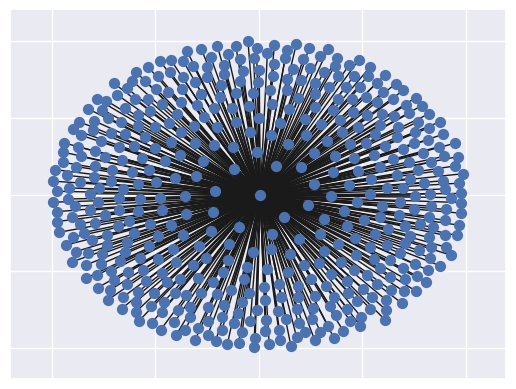

In [99]:
# ego graph of a main hub
# sample node of a large degree
seed = 20532
egonet1 = nx.ego_graph(G0, 145449)

pos = nx.spring_layout(egonet1, seed=seed)
nx.draw_networkx(egonet1, pos, node_color = "b", node_size = 50, with_labels = False)
plt.show()

In [37]:
table.sort_values(by=['Degree', 'Hubs'], ascending = False).tail(5)

,Authorities,PageRank,Hubs,Degree
248784,0.000014,8.463018e-07,-2.929658e-08,0.000003
248975,0.000014,8.463018e-07,-2.929658e-08,0.000003
249997,0.000014,8.463018e-07,-2.929658e-08,0.000003
250321,0.000014,8.463018e-07,-2.929658e-08,0.000003
250513,0.000014,8.463018e-07,-2.929658e-08,0.000003


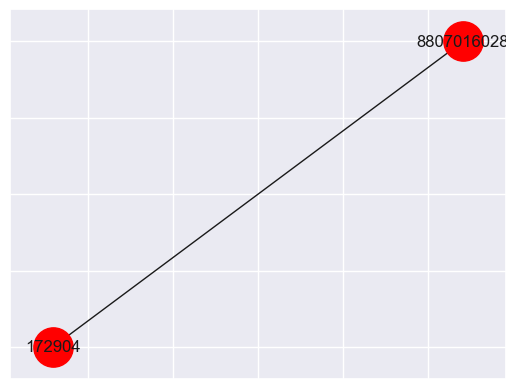

In [96]:
# ego graph of a main hub
# sample node with a small degree
egonet2 = nx.ego_graph(G0, 172904)
nx.draw_networkx(egonet2, node_color = "red", node_size = 800, with_labels = True)

In [36]:
# calculate the correlations for each pair of centralities
c_df = table.corr()
ll_triangle = np.tri(c_df.shape[0], k=-1)
c_df*=ll_triangle
c_series = c_df.stack().sort_values()
#c_series2 = pd.DataFrame(c_series)
c_series.tail()

Hubs      PageRank       0.069539
Degree    Hubs           0.152416
PageRank  Authorities    0.852560
Degree    Authorities    0.897985
          PageRank       0.977610
dtype: float64

**The correlations between centrality measures in the Book-Crossing network can be summarized as follows:**

**Hubs and PageRank:** There is a weak positive correlation (0.069539) between Hubs and PageRank centrality, indicating a slight association between these measures.

**Degree and Hubs:** There is a weak positive correlation (0.152416) between Degree and Hubs centrality, suggesting a small relationship between the number of connections and hubness.

**PageRank and Authorities:** There is a strong positive correlation (0.852560) between PageRank and Authorities centrality, indicating that nodes with high PageRank tend to have high authority, and vice versa.

**Degree and Authorities:** There is a strong positive correlation (0.897985) between Degree and Authorities centrality, suggesting that nodes with more connections tend to have higher authority.

**PageRank and Degree:** There is a very strong positive correlation (0.977610) between PageRank and Degree centrality, indicating that nodes with more connections tend to have higher importance and influence according to PageRank.

## Conclusion 

**These correlations suggest that influential users (Hubs and PageRank) and authoritative books (Authorities) play a significant role in shaping the network structure. Users who have a large number of interactions (Degree) tend to connect with other highly connected users and interact with authoritative books. Additionally, influential users' interactions with books can contribute to the overall influence and importance of those books (PageRank).**